In [1]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit import Aer
from qiskit import execute
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

## This notebook attempts to create a circuit synthesizer that approximates CCNOT.

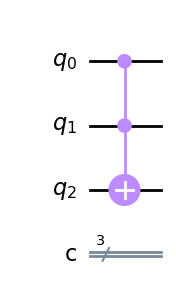

In [2]:
ccnot_circuit = QuantumCircuit(3, 3)
ccnot_circuit.ccx(0, 1, 2)
ccnot_circuit.draw('mpl')

# Approach 1: Estimation with CNOT, H, and T gates

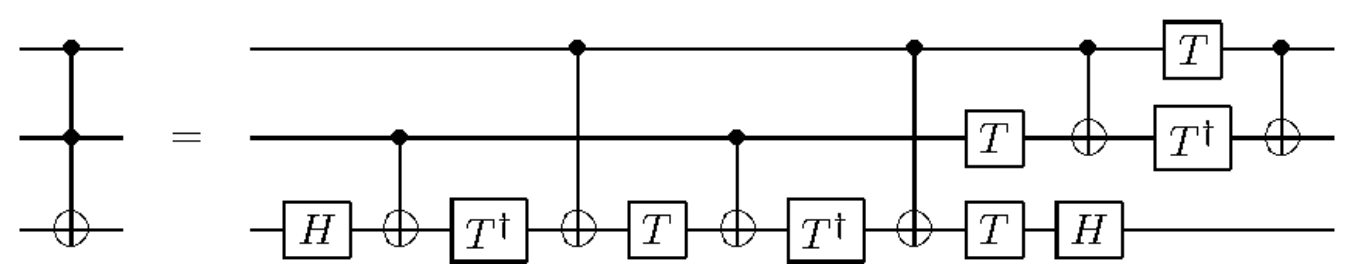

#### This circuit exceeds the 4 2-qubit gate limit, so we will exclude the last 2 gates and the surrounding 1-qubit gates for the final result. For comparison purposes I will also do a run with those gates left in, to see how much accuracy is lost.

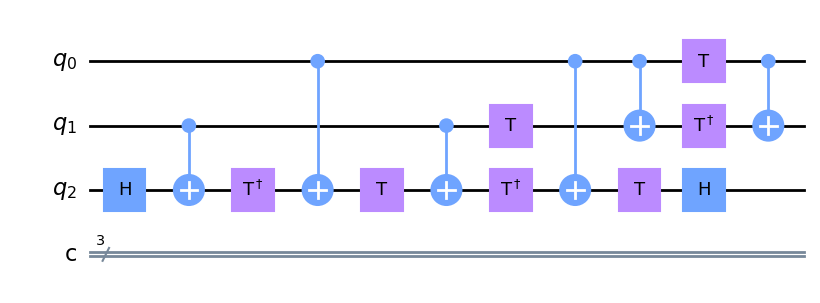

In [3]:
H_T_approximation_complete = QuantumCircuit(3, 3)
H_T_approximation_complete.h(2)
H_T_approximation_complete.cnot(1, 2)
H_T_approximation_complete.tdg(2)
H_T_approximation_complete.cnot(0, 2)
H_T_approximation_complete.t(2)
H_T_approximation_complete.cnot(1, 2)
H_T_approximation_complete.tdg(2)
H_T_approximation_complete.cnot(0, 2)
H_T_approximation_complete.t(1)
H_T_approximation_complete.t(2)
H_T_approximation_complete.h(2)
H_T_approximation_complete.cnot(0, 1)
H_T_approximation_complete.t(0)
H_T_approximation_complete.tdg(1)
H_T_approximation_complete.cnot(0, 1)

H_T_approximation_complete.draw('mpl')

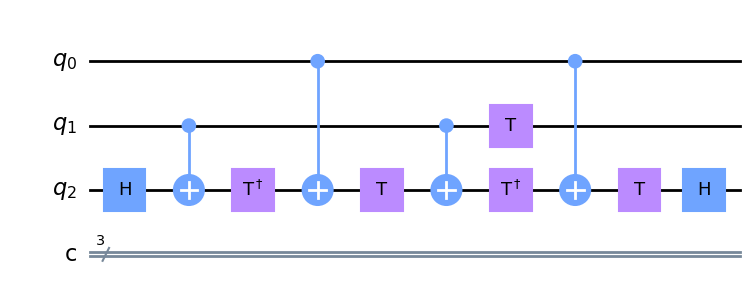

In [4]:
H_T_approximation_partial = QuantumCircuit(3, 3)
H_T_approximation_partial.h(2)
H_T_approximation_partial.cnot(1, 2)
H_T_approximation_partial.tdg(2)
H_T_approximation_partial.cnot(0, 2)
H_T_approximation_partial.t(2)
H_T_approximation_partial.cnot(1, 2)
H_T_approximation_partial.tdg(2)
H_T_approximation_partial.cnot(0, 2)
H_T_approximation_partial.t(1)
H_T_approximation_partial.t(2)
H_T_approximation_partial.h(2)

H_T_approximation_partial.draw('mpl')

### Comparison

In [5]:
# To get a matrix closer to what we're used to, reverse the bits on the circuits
ccnot_circuit = ccnot_circuit.reverse_bits()
H_T_approximation_complete = H_T_approximation_complete.reverse_bits()
H_T_approximation_partial = H_T_approximation_partial.reverse_bits()

##### CCNOT vs complete approximation circuit

In [6]:
backend = Aer.get_backend('unitary_simulator')
job = execute(ccnot_circuit, backend, shots=8192)
# There are no complex numbers in the output, so I am casting to float for cleaner output
ccnot_unitary = job.result().get_unitary(ccnot_circuit)._data.astype('float16')

job = execute(H_T_approximation_complete, backend, shots=8192)
H_T_approximation_complete_unitary = job.result().get_unitary(H_T_approximation_complete)._data.astype('float16')

job = execute(H_T_approximation_partial, backend, shots=8192)
H_T_approximation_partial_unitary = job.result().get_unitary(H_T_approximation_partial)._data.astype('float16')

/Users/scotttw/opt/anaconda3/envs/Quantum/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/Users/scotttw/opt/anaconda3/envs/Quantum/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/Users/scotttw/opt/anaconda3/envs/Quantum/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [7]:
ccnot_unitary

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float16)

In [8]:
H_T_approximation_complete_unitary

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -0.]], dtype=float16)

In [9]:
H_T_approximation_partial_unitary

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.707, -0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.707,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.   , -0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.707],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.707, -0.   ]],
      dtype=float16)

So from this, we can see that the complete approximation is exactly correct. The partial approximation is almost correct, but some of the 1's are replaced with 0.707, so the amplitudes are off.

# Approach 2: Estimation with CNOT and Y gates.

If we use Y gates and 3 CNOT gates, we can approximate CCNOT.

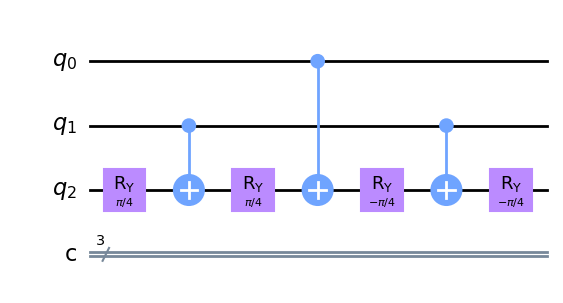

In [10]:
ry_approximation_circuit = QuantumCircuit(3, 3)
ry_approximation_circuit.reverse_bits()
ry_approximation_circuit.ry(np.pi / 4, 2)
ry_approximation_circuit.cnot(1, 2)
ry_approximation_circuit.ry(np.pi / 4, 2)
ry_approximation_circuit.cnot(0, 2)
ry_approximation_circuit.ry(-np.pi / 4, 2)
ry_approximation_circuit.cnot(1, 2)
ry_approximation_circuit.ry(-np.pi / 4, 2)

ry_approximation_circuit.draw('mpl')

### Comparison

There are two ways to compare, one is to compare the unitaries between these two circuits, and the other is to run the circuits for all the possible inputs and see the differences.

In [11]:
# For the purposes of finding the matrix, reverse the circuit bits. This is because of how qiskit reverses the bit orders by default.
ry_approximation_circuit = ry_approximation_circuit.reverse_bits()

In [12]:
backend = Aer.get_backend('unitary_simulator')
job = execute(ccnot_circuit, backend, shots=8192)
# There are no complex numbers in the output, so I am casting to float for cleaner output
ccnot_unitary = job.result().get_unitary(ccnot_circuit)._data.astype('float16')

job = execute(ry_approximation_circuit, backend, shots=8192)
ry_unitary = job.result().get_unitary(ry_approximation_circuit)._data.astype('float16')

/Users/scotttw/opt/anaconda3/envs/Quantum/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/Users/scotttw/opt/anaconda3/envs/Quantum/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [13]:
ccnot_unitary

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float16)

In [14]:
ry_unitary

array([[ 1., -0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]], dtype=float16)

As we can see, these unitaries are basically the same, except that there is a stray -1 on the 101 case.